In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

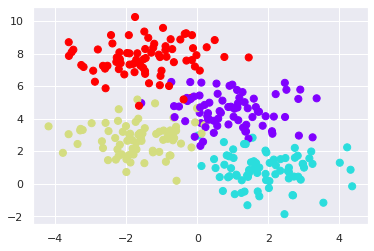

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x, y)

In [4]:
def visualize_classifier(model, x, y, ax=None, boundaries=True, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='viridis',
              clim=(y.min(), y.max()), zorder=3)
    
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contour(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5,
        cmap='viridis', clim=(y.min(), y.max()), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)
    
    """
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = model.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)
    """

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


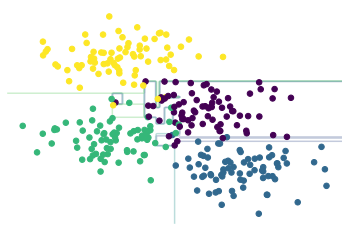

In [5]:
visualize_classifier(DecisionTreeClassifier(), x, y)

In [6]:
import helpers_05_08

helpers_05_08.plot_tree_interactive(x, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [7]:
helpers_05_08.randomized_tree_interactive(x, y);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


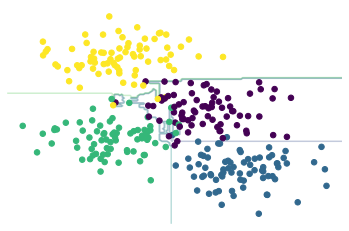

In [8]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(x, y)
visualize_classifier(bag, x, y)

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'clim'


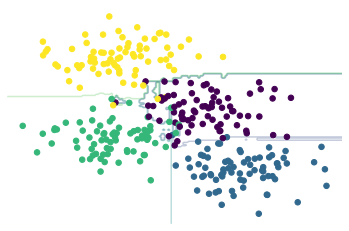

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, x, y);

In [10]:
from ipywidgets import interact

def plot_tree_interactive(model, x, y):
    def interactive_tree(depth=5):
        visualize_classifier(model, x, y)

    return interact(interactive_tree, depth=[1, 5])

In [11]:
plot_tree_interactive(model, x, y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

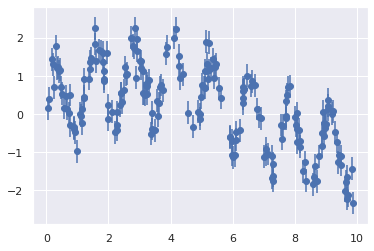

In [14]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008008   0.81081081  0

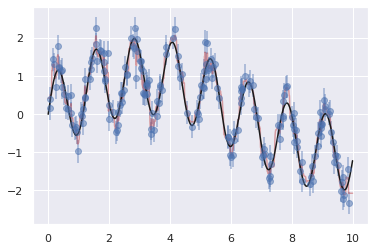

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
print(xfit)
print(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r', alpha=0.5);
plt.plot(xfit, ytrue, '-k');

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

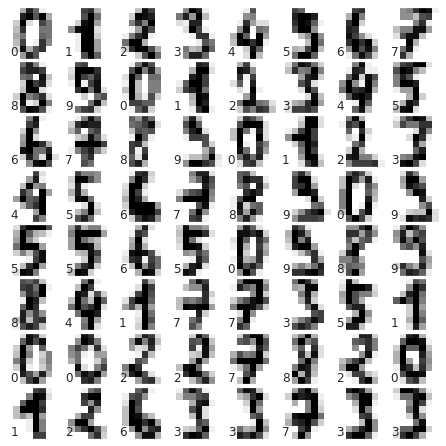

In [20]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    ax.text(0, 7, str(digits.target[i]))

In [21]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [23]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



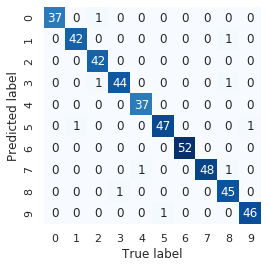

In [26]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label');